## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
# 建立一個有4層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [7]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.sgd(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0716 22:13:51.908506 10736 deprecation_wrapper.py:119] From C:\Users\pablo\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 22:13:51.908506 10736 deprecation_wrapper.py:119] From C:\Users\pablo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0716 22:13:55.954432 10736 deprecation.py:323] From C:\Users\pablo\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 22:13:56.001316 10736 deprecation_wrapper.py:119] From C:\Users\pablo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 76us/step - loss: 2.2767 - acc: 0.1472 - val_loss: 2.2382 - val_acc: 0.1801
Epoch 2/500
50000/50000 [==============================] - 2s 47us/step - loss: 2.2079 - acc: 0.2045 - val_loss: 2.1852 - val_acc: 0.2102
Epoch 3/500
50000/50000 [==============================] - 2s 47us/step - loss: 2.1597 - acc: 0.2322 - val_loss: 2.1405 - val_acc: 0.2293
Epoch 4/500
50000/50000 [==============================] - 2s 46us/step - loss: 2.1166 - acc: 0.2515 - val_loss: 2.0999 - val_acc: 0.2498
Epoch 5/500
50000/50000 [==============================] - 2s 45us/step - loss: 2.0779 - acc: 0.2673 - val_loss: 2.0640 - val_acc: 0.2716
Epoch 6/500
50000/50000 [==============================] - 2s 45us/step - loss: 2.0444 - acc: 0.2808 - val_loss: 2.0335 - val_acc: 0.2885
Epoch 7/500
50000/50000 [==============================] - 2s 45us/step - loss: 2.0159 - acc: 0.2906 - val_loss: 2.0079 - 

50000/50000 [==============================] - 2s 45us/step - loss: 1.6371 - acc: 0.4277 - val_loss: 1.6422 - val_acc: 0.4199
Epoch 60/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.6340 - acc: 0.4281 - val_loss: 1.6394 - val_acc: 0.4204
Epoch 61/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.6307 - acc: 0.4295 - val_loss: 1.6401 - val_acc: 0.4213
Epoch 62/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.6276 - acc: 0.4298 - val_loss: 1.6349 - val_acc: 0.4254
Epoch 63/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.6240 - acc: 0.4307 - val_loss: 1.6299 - val_acc: 0.4243
Epoch 64/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.6214 - acc: 0.4325 - val_loss: 1.6294 - val_acc: 0.4256
Epoch 65/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.6175 - acc: 0.4334 - val_loss: 1.6279 - val_acc: 0.4256
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.4860 - acc: 0.4758 - val_loss: 1.5139 - val_acc: 0.4679
Epoch 119/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.4837 - acc: 0.4776 - val_loss: 1.5149 - val_acc: 0.4627
Epoch 120/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4821 - acc: 0.4795 - val_loss: 1.5143 - val_acc: 0.4651
Epoch 121/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.4803 - acc: 0.4800 - val_loss: 1.5096 - val_acc: 0.4624
Epoch 122/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.4778 - acc: 0.4800 - val_loss: 1.5104 - val_acc: 0.4606
Epoch 123/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.4758 - acc: 0.4809 - val_loss: 1.5124 - val_acc: 0.4626
Epoch 124/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.4729 - acc: 0.4818 - val_loss: 1.5036 - val_acc: 0.4642
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 45us/step - loss: 1.3775 - acc: 0.5154 - val_loss: 1.4496 - val_acc: 0.4842
Epoch 177/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.3767 - acc: 0.5150 - val_loss: 1.4452 - val_acc: 0.4847
Epoch 178/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3748 - acc: 0.5151 - val_loss: 1.4363 - val_acc: 0.4887
Epoch 179/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.3730 - acc: 0.5162 - val_loss: 1.4446 - val_acc: 0.4882
Epoch 180/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.3722 - acc: 0.5168 - val_loss: 1.4448 - val_acc: 0.4837
Epoch 181/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.3700 - acc: 0.5174 - val_loss: 1.4378 - val_acc: 0.4867
Epoch 182/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.3675 - acc: 0.5182 - val_loss: 1.4652 - val_acc: 0.4801
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 45us/step - loss: 1.2864 - acc: 0.5463 - val_loss: 1.3974 - val_acc: 0.5029
Epoch 235/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.2868 - acc: 0.5457 - val_loss: 1.3926 - val_acc: 0.5066
Epoch 236/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.2854 - acc: 0.5465 - val_loss: 1.3999 - val_acc: 0.5033
Epoch 237/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.2831 - acc: 0.5481 - val_loss: 1.3927 - val_acc: 0.5033
Epoch 238/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.2818 - acc: 0.5464 - val_loss: 1.4059 - val_acc: 0.4993
Epoch 239/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.2813 - acc: 0.5480 - val_loss: 1.3909 - val_acc: 0.5105
Epoch 240/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.2786 - acc: 0.5478 - val_loss: 1.3851 - val_acc: 0.5070
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 2s 48us/step - loss: 1.2082 - acc: 0.5718 - val_loss: 1.3675 - val_acc: 0.5126
Epoch 293/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2098 - acc: 0.5712 - val_loss: 1.3646 - val_acc: 0.5112
Epoch 294/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.2077 - acc: 0.5718 - val_loss: 1.3727 - val_acc: 0.5102
Epoch 295/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.2061 - acc: 0.5742 - val_loss: 1.4275 - val_acc: 0.4980
Epoch 296/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.2014 - acc: 0.5743 - val_loss: 1.3693 - val_acc: 0.5097
Epoch 297/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.2021 - acc: 0.5737 - val_loss: 1.4117 - val_acc: 0.5040
Epoch 298/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.2016 - acc: 0.5744 - val_loss: 1.3920 - val_acc: 0.5089
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 1.1357 - acc: 0.5978 - val_loss: 1.3871 - val_acc: 0.5132
Epoch 351/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.1350 - acc: 0.5989 - val_loss: 1.3408 - val_acc: 0.5231
Epoch 352/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1270 - acc: 0.6009 - val_loss: 1.3599 - val_acc: 0.5181
Epoch 353/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.1346 - acc: 0.5984 - val_loss: 1.4084 - val_acc: 0.5091
Epoch 354/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.1287 - acc: 0.6020 - val_loss: 1.3674 - val_acc: 0.5166
Epoch 355/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.1244 - acc: 0.6033 - val_loss: 1.3995 - val_acc: 0.5124
Epoch 356/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.1253 - acc: 0.6008 - val_loss: 1.4062 - val_acc: 0.5043
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 2s 47us/step - loss: 1.0688 - acc: 0.6236 - val_loss: 1.4173 - val_acc: 0.5135
Epoch 409/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0705 - acc: 0.6224 - val_loss: 1.3559 - val_acc: 0.5246
Epoch 410/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0601 - acc: 0.6253 - val_loss: 1.3353 - val_acc: 0.5313
Epoch 411/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0589 - acc: 0.6274 - val_loss: 1.4707 - val_acc: 0.4961
Epoch 412/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0640 - acc: 0.6253 - val_loss: 1.4221 - val_acc: 0.5026
Epoch 413/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.0558 - acc: 0.6260 - val_loss: 1.3649 - val_acc: 0.5225
Epoch 414/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.0578 - acc: 0.6260 - val_loss: 1.3744 - val_acc: 0.5216
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 0.9932 - acc: 0.6482 - val_loss: 1.3713 - val_acc: 0.5255
Epoch 467/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9923 - acc: 0.6495 - val_loss: 1.4856 - val_acc: 0.4958
Epoch 468/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9924 - acc: 0.6505 - val_loss: 1.3941 - val_acc: 0.5217
Epoch 469/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.9886 - acc: 0.6504 - val_loss: 1.3766 - val_acc: 0.5229
Epoch 470/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.9968 - acc: 0.6480 - val_loss: 1.4182 - val_acc: 0.5155
Epoch 471/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9924 - acc: 0.6500 - val_loss: 1.3395 - val_acc: 0.5319
Epoch 472/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9967 - acc: 0.6489 - val_loss: 1.3704 - val_acc: 0.5214
Epoch 473/500
50000/50000 [=======

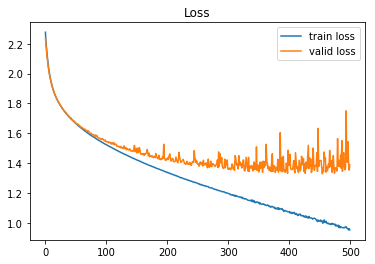

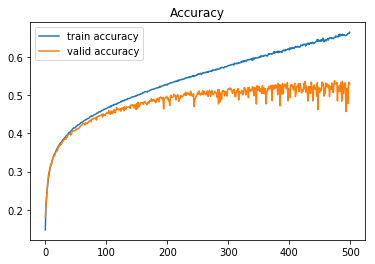

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()